In [3]:
import numpy as np
import Graph
import os
import csv
import folium
from folium.features import CustomIcon
from folium.features import DivIcon
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline

# Case Study

In [2]:
dir = "out/case/out_new/"
intervals = [[0 for i in range(6)] for j in range(10)]
rCosts = [[0 for i in range(6)] for j in range(10)]
discs = [[0 for i in range(6)] for j in range(10)]
pprod = [[0 for i in range(6)] for j in range(10)]
pcust = [[0 for i in range(6)] for j in range(10)]
pcustfull = [[0 for i in range(6)] for j in range(10)]
gaps = []
for file in os.listdir(dir):
    with open(dir + file, 'rb') as f:
        f.seek(-2, os.SEEK_END)
        while f.read(1) != b'\n':
            f.seek(-2, os.SEEK_CUR)
        last_line = f.readline().decode()
        seed = int(file[-5])
        try:
            s = int(file[8])
        except:
            s = 0
        stats1 = last_line.split(", [")[0].split(", ")
        if s > 0:
            stats2 = last_line.split(", [")[1]
            intervals[seed][s] = [float(stats1[0][2:]), float(stats1[1])]
            pcustfull[seed][s] = float(stats1[-1][:-1])
        else:
            intervals[seed][s] = [float(stats1[0][1:]), float(stats1[1])]
            pcustfull[seed][s] = float(stats1[-1][:-2])
        gaps.append(float(stats1[4]) * 100)
        rCosts[seed][s] = float(stats1[2])
        discs[seed][s] = float(stats1[6])
        pprod[seed][s] = float(stats1[-3])
        pcust[seed][s] = float(stats1[-2])

In [4]:
max(gaps)

1.4325591108394422

In [5]:
min(gaps)

0.007108249709530206

In [3]:
i_tmp = np.transpose(intervals)

In [4]:
interval_means = [[np.mean(x) for x in i_tmp[0]], [np.mean(x) for x in i_tmp[1]]]

C:\Users\atevs\AppData\Local\Temp\ipykernel_17704\3707972526.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((i, i), (interval_means[0][i], interval_means[1][i]), 'ro-', color="#990000")


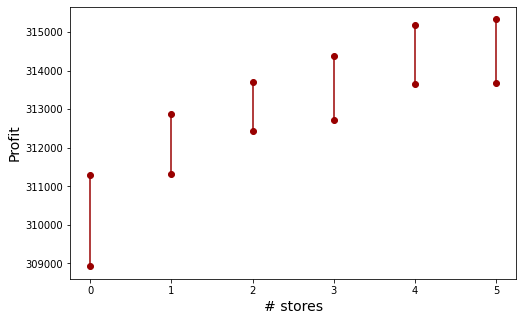

In [8]:
fig,ax = plt.subplots(figsize=(8, 5))
for i in range(6):
    plt.plot((i, i), (interval_means[0][i], interval_means[1][i]), 'ro-', color="#990000")
plt.xticks(range(6))
plt.ylabel("Profit", fontsize=14)
plt.xlabel("# stores", fontsize=14)
plt.savefig("mean_intervals.svg", dpi=300)

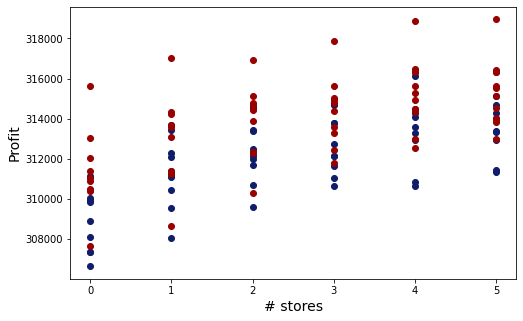

In [9]:
fig,ax = plt.subplots(figsize=(8, 5))
for i in range(10):
    plt.plot([x[0] for x in intervals[i]], 'o', color="#101D6B")
for i in range(10):
    plt.plot([x[1] for x in intervals[i]], 'o', color="#990000")
plt.xticks(range(6))
plt.ylabel("Profit", fontsize=14)
plt.xlabel("# stores", fontsize=14)
plt.savefig("intervals.svg", dpi=300)

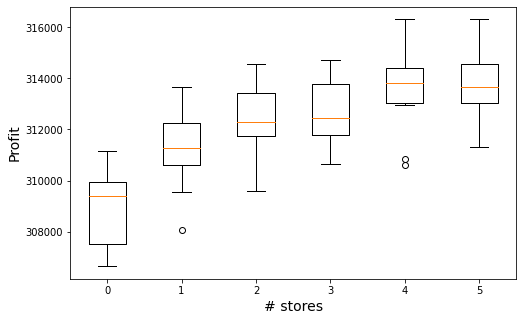

In [10]:
plt.figure(figsize=(8, 5))
plt.boxplot([i_tmp[0][i] for i in range(6)], labels=range(6))
#plt.plot(range(1, 7), interval_means[0], 'o-', color="#101D6B")
plt.ylabel("Profit", fontsize=14)
plt.xlabel("# stores", fontsize=14)
plt.savefig("profit_box.svg", format = 'svg', dpi=300)

In [5]:
disc_means = [np.mean(x) for x in np.transpose(discs)]
pprod_means = [np.mean(x) for x in np.transpose(pprod)]
pcust_means = [np.mean(x) for x in np.transpose(pcust)]
pcustfull_means = [np.mean(x) for x in np.transpose(pcustfull)]
rCost_means = [np.mean(x) for x in np.transpose(rCosts)]

In [6]:
lonRouts = [[0 for i in range(6)] for j in range(10)]
for file in os.listdir(dir):
    with open(dir + file, 'rb') as f:
        seed = int(file[-5])
        try:
            s = int(file[8])
        except:
            s = 0
        lines = f.readlines()
        for i in range(len(lines)):
            if "Routing:" in str(lines[i]):
                break
        lonRouts[seed][s] = float(str(lines[i + 1]).split(", ")[0][3:])
        

In [7]:
lonRouts_means = [np.mean(x) for x in np.transpose(lonRouts)]

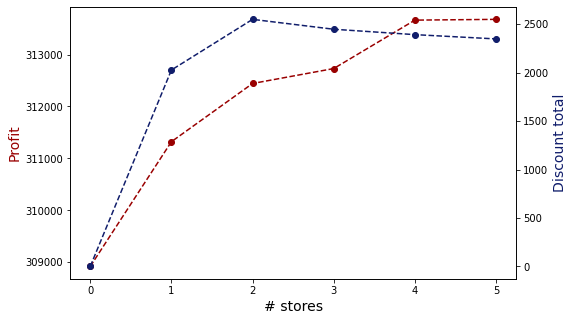

<Figure size 432x288 with 0 Axes>

In [12]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(8, 5))
# make a plot
ax.plot(range(6), interval_means[0], color="#990000", marker="o", linestyle="--")
# set x-axis label
ax.set_xlabel("# stores", fontsize = 14)
# set y-axis label
ax.set_ylabel("Profit", color="#990000", fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(range(6), disc_means, color="#101D6B", marker="o", linestyle="--")
ax2.set_ylabel("Discount total",color="#101D6B",fontsize=14)
plt.show()
# save the plot as a file
plt.savefig("prof_disc_avg.svg", format = 'svg', dpi=300)

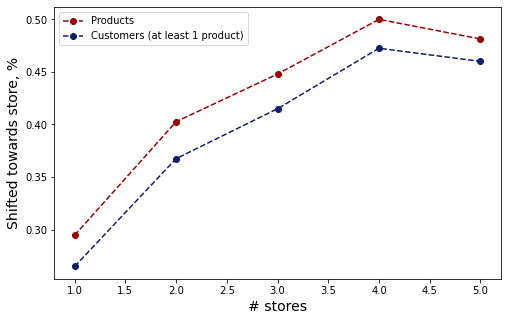

In [15]:
fig,ax = plt.subplots(figsize=(8, 5))
plt.plot(range(1, 6), pprod_means[1:], linestyle="--", marker="o", color="#990000", label="Products")
plt.plot(range(1, 6), pcust_means[1:], linestyle="--", marker="o", color="#101D6B", label="Customers (at least 1 product)")
#plt.plot(range(1, 6), pcustfull_means[1:], linestyle="--", marker="o", color="#028A0F", label="Customers (full order)")
plt.ylabel("Shifted towards store, %", fontsize=14)
plt.xlabel("# stores", fontsize=14)
plt.legend()
# save the plot as a file
plt.savefig("shift.svg", format = 'svg', dpi=300)

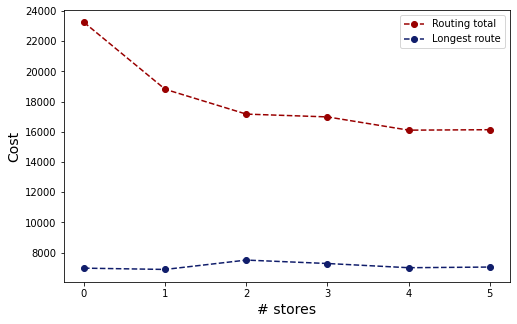

In [29]:
fig,ax = plt.subplots(figsize=(8, 5))
plt.plot(range(6), rCost_means, linestyle="--", marker="o", color="#990000", label="Routing total")
plt.plot(range(6), lonRouts_means, linestyle="--", marker="o", color="#101D6B", label="Longest route")
plt.ylabel("Cost", fontsize=14)
plt.xlabel("# stores", fontsize=14)
plt.legend()
plt.savefig("shift.svg", format = 'svg', dpi=300)

In [9]:
interval_means

[[308920.144439103,
  311321.9267953776,
  312443.11450874223,
  312730.6518597048,
  313663.14826316637,
  313677.94693715445],
 [311299.64453928743,
  312872.68187644996,
  313702.53142517543,
  314372.51161470247,
  315186.350035168,
  315333.6227587568]]

In [13]:
rCost_means[0] - rCost_means[-1]

7106.524187144631

In [16]:
lonRouts_means

[6969.3453707967055,
 6883.487235472285,
 7503.438992934881,
 7276.198423586099,
 6998.119834828028,
 7041.615690929172]

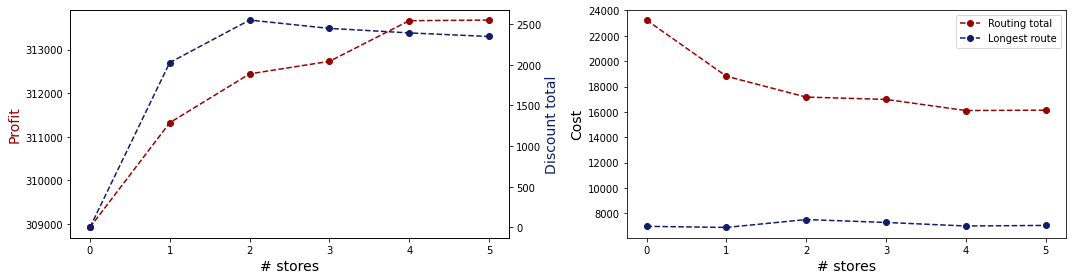

In [31]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(1, 2, figsize=(15, 4))
# make a plot
ax[0].plot(range(6), interval_means[0], color="#990000", marker="o", linestyle="--")
# set x-axis label
ax[0].set_xlabel("# stores", fontsize = 14)
# set y-axis label
ax[0].set_ylabel("Profit", color="#990000", fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax[0].twinx()
# make a plot with different y-axis using second axis object
ax2.plot(range(6), disc_means, color="#101D6B", marker="o", linestyle="--")
ax2.set_ylabel("Discount total",color="#101D6B",fontsize=14)
ax[1].plot(range(6), rCost_means, linestyle="--", marker="o", color="#990000", label="Routing total")
ax[1].plot(range(6), lonRouts_means, linestyle="--", marker="o", color="#101D6B", label="Longest route")
ax[1].set_ylabel("Cost", fontsize=14)
ax[1].set_xlabel("# stores", fontsize=14)
ax[1].legend()
fig.tight_layout()
'''ax[2].plot(range(1, 6), pprods, linestyle="--", marker="o", color="#990000", label="Products")
ax[2].plot(range(1, 6), pcusts, linestyle="--", marker="o", color="#101D6B", label="Customers")
ax[2].set_xlabel("# stores", fontsize=14)
ax[2].set_ylabel("Percent", fontsize=14)
#ax[2].set(xlabel='# stores', ylabel='Percent')
ax[2].legend()'''
# save the plot as a file
fig.savefig('disc_routs.svg', dpi=300)

# Maps

In [4]:
G = Graph.Graph()
f1 = "D:\Study\Ph.D\Projects\Bilevel Optimization\\data\\Buffalo\\ss_dists_new.txt"
f2 = "D:\Study\Ph.D\Projects\Bilevel Optimization\\data\\Buffalo\\cc_dists_rand3.txt"
f3 = "D:\Study\Ph.D\Projects\Bilevel Optimization\\data\\Buffalo\\sc_dists_rand3.txt"
f4 = "D:\Study\Ph.D\Projects\Bilevel Optimization\\data\\Buffalo\\cust_coords_rand3.txt"
f5 = "D:\Study\Ph.D\Projects\Bilevel Optimization\\data\\Buffalo\\store_coords.txt"
f6 = "D:\Study\Ph.D\Projects\Bilevel Optimization\\data\\Buffalo\\cc_routs_rand3.txt"
f7 = "D:\Study\Ph.D\Projects\Bilevel Optimization\\data\\Buffalo\\sc_routs_rand3.txt"
f8 = "D:\Study\Ph.D\Projects\Bilevel Optimization\\data\\Buffalo\\ss_routs_new.txt"
G.readSampleWithDistsRC(f1, f2, f3, f4, f5, 41, 5, 100, 4, rf1=f6, rf2=f7, rf3=f8, tot_custs=41, tot_stores=5)

In [6]:
dir = "out/case/out_new/"
file = "Buffalo-5stores_k40_seed3.out"
colors = ["#990000", "#101D6B", "#028A0F", "#016064"]
wh = CustomIcon("D:\Study\Ph.D\Projects\Bilevel Optimization\papers\img\loc_pricing\warehouse.png", icon_size=(50, 25))
m = folium.Map(location=(42.93, -78.79), zoom_start=11, tiles="cartodb positron")
#folium.TileLayer('Mapbox Bright').add_to(m)
#base_map = folium.FeatureGroup(name='Basemap', overlay=True, control=False)
#folium.TileLayer(tiles='OpenStreetMap').add_to(base_map)
#base_map.add_to(m)
fg = folium.FeatureGroup(name="stores", overlay=False, show=False)
folium.Marker(location=G.points[0], icon=wh).add_to(fg)
fg1 = folium.FeatureGroup(name="custs", overlay=False, show=False)
fg2 = folium.FeatureGroup(name="routs", overlay=False, show=False)
with open(dir + file, 'rb') as f:
    seed = int(file[-5])
    try:
        S = int(file[8])
    except:
        S = 0

    for s in range(S):
        store = CustomIcon("D:\Study\Ph.D\Projects\Bilevel Optimization\papers\img\loc_pricing\store%d.png" % (s + 1), icon_size=(20, 20))
        folium.Marker(location=G.points[G.K + s], icon=store, popup=s).add_to(fg)
        #folium.map.Marker(tuple([G.points[G.K + s][0] + 0.007, G.points[G.K + s][1] + 0.007]), icon=DivIcon(icon_size=(150,36), icon_anchor=(0,0), html='<div style="font-size: 8pt, bold">%d</div>' % s)).add_to(fg)
    fg.add_to(m)

    lines = f.readlines()

    #homes
    for i in range(len(lines)):
        if "Customers decisions:" in str(lines[i]):
            break
    for j in range(i + 1, len(lines)):
        if "Routing:" in str(lines[j]):
            break
        if "Customer" in str(lines[j]):
            k = int(str(lines[j]).split(" - ")[0].split(" ")[1])
        else:
            choice = int(float(str(lines[j]).split(": ")[1].split(" ")[0]))
            if choice == 1:
                s = int(str(lines[j]).split(": ")[0][2:].split(", ")[0]) - G.K
                if s >= 0:
                    home = CustomIcon("D:\Study\Ph.D\Projects\Bilevel Optimization\papers\img\loc_pricing\home%d.png" % (s + 1), icon_size=(20, 20))
                    folium.Marker(location=G.points[k], icon=home, popup=k).add_to(fg1)
                else:
                    home = CustomIcon("D:\Study\Ph.D\Projects\Bilevel Optimization\papers\img\loc_pricing\home.png", icon_size=(20, 20))
                    folium.Marker(location=G.points[k], icon=home, popup=k).add_to(fg1)

    #routing
    for i in range(j + 6, len(lines)):
        if "Routing cost:" in str(lines[i]):
            break
        else:
            #print(str(lines[i]).split(", "))
            r = int(str(lines[i]).split(", ")[2][:-3])
            p1 = int(str(lines[i]).split(", ")[0][2:])
            p2 = int(str(lines[i]).split(", ")[1])
            folium.PolyLine([(x[0] + 0.0007 * r, x[1] + 0.0007 * r) for x in G.routs[(p1, p2)]], color=colors[r], weight=3).add_to(fg2)

fg1.add_to(m)
fg2.add_to(m)
m.save("out\case\img_new\\5stores_seed3.html")

In [9]:
G.K + s

44

In [11]:
s

3

In [10]:
len(G.points)

44

# 60 custs

In [2]:
intervals = [[489833, 490723], [494250, 494925], [494807, 495792], [495680, 496368], [496134, 496620], [496302, 496695], [496657, 497243]]
intervals = [[313082, 317144], [320520, 322131], [321639, 322595], [321733, 323747], [323209, 324509], [323209, 324761]] #40 custs

C:\Users\atevs\AppData\Local\Temp\ipykernel_8836\2751243410.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((intervals[i][0]/1000, intervals[i][1]/1000), (i, i), 'ro-', color="#990000")


Text(0, 0.5, '# stores')

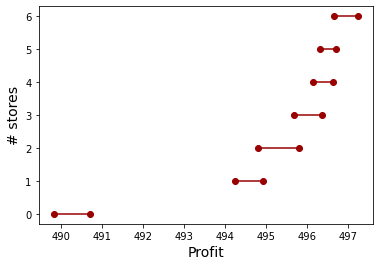

In [27]:
#fig, ax = plt.subplots(figsize=(12, 7))
#plt.plot([x[0] for x in intervals], range(7), linestyle="--", color="black")
#plt.plot([x[1] for x in intervals], range(7), linestyle="--")
for i in range(7):
    plt.plot((intervals[i][0]/1000, intervals[i][1]/1000), (i, i), 'ro-', color="#990000")
plt.yticks(range(7))
plt.xlabel("Profit", fontsize=14)
plt.ylabel("# stores", fontsize=14)

C:\Users\atevs\AppData\Local\Temp\ipykernel_2828\3323361369.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((i, i), (intervals[i][0], intervals[i][1]), 'ro-', color="#990000")


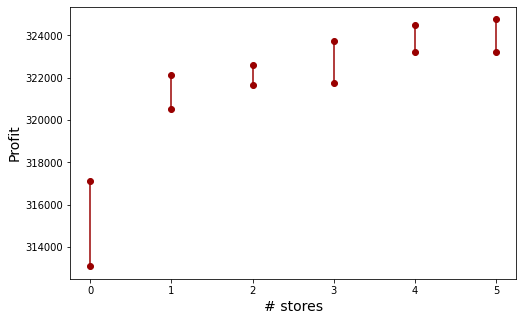

In [6]:
fig,ax = plt.subplots(figsize=(8, 5))
for i in range(6):
    plt.plot((i, i), (intervals[i][0], intervals[i][1]), 'ro-', color="#990000")
plt.xticks(range(6))
plt.ylabel("Profit", fontsize=14)
plt.xlabel("# stores", fontsize=14)
plt.savefig("intervals.svg", dpi=300)

In [3]:
rcosts = [16873, 7467, 7206, 6901, 6670, 6805, 7069]
spent = [0, 4367, 4072, 3504, 3280, 2976, 2359]

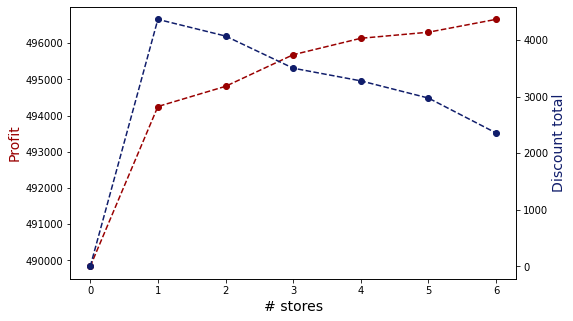

In [4]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(8, 5))
# make a plot
ax.plot(range(7), [x[0] for x in intervals], color="#990000", marker="o", linestyle="--")
# set x-axis label
ax.set_xlabel("# stores", fontsize = 14)
# set y-axis label
ax.set_ylabel("Profit", color="#990000", fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(range(7), spent, color="#101D6B", marker="o", linestyle="--")
ax2.set_ylabel("Discount total",color="#101D6B",fontsize=14)
plt.show()
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg', format='jpeg', dpi=100, bbox_inches='tight')

In [5]:
pprods = [70.5, 70.5, 73.2, 79.5, 79.5, 78.6]
pcusts = [70, 68.3, 71.7, 76.7, 78.3, 78.3]
pcustfull = [68.3, 66.7, 70, 75, 76.7, 76.6]

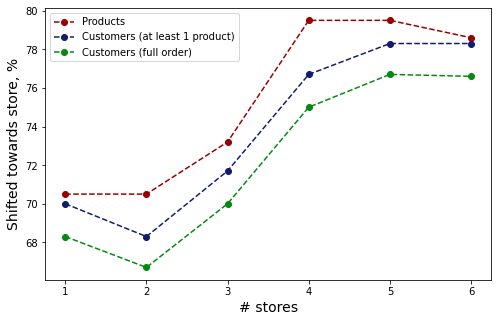

In [6]:
fig,ax = plt.subplots(figsize=(8, 5))
plt.plot(range(1, 7), pprods, linestyle="--", marker="o", color="#990000", label="Products")
plt.plot(range(1, 7), pcusts, linestyle="--", marker="o", color="#101D6B", label="Customers (at least 1 product)")
plt.plot(range(1, 7), pcustfull, linestyle="--", marker="o", color="#028A0F", label="Customers (full order)")
plt.ylabel("Shifted towards store, %", fontsize=14)
plt.xlabel("# stores", fontsize=14)
plt.legend()

In [7]:
lonRouts = [8884, 6273, 6216, 6103, 5872, 5870, 6133]
rCosts = [16873, 7467, 7206, 6901, 6670, 6805, 7068]

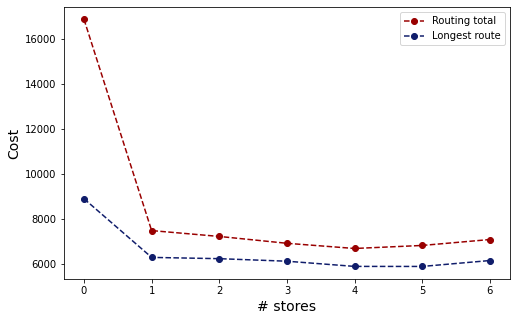

In [8]:
fig,ax = plt.subplots(figsize=(8, 5))
plt.plot(range(7), rCosts, linestyle="--", marker="o", color="#990000", label="Routing total")
plt.plot(range(7), lonRouts, linestyle="--", marker="o", color="#101D6B", label="Longest route")
plt.ylabel("Cost", fontsize=14)
plt.xlabel("# stores", fontsize=14)
plt.legend()

# 40 custs

In [3]:
#profits = [318382, 325264, 326746, 326746, 329042, 329042]
profits = [x[0] for x in intervals]

C:\Users\atevs\AppData\Local\Temp\ipykernel_2828\757800703.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(range(6), profits, 'ro-', color="#990000")


Text(0.5, 0, '# stores')

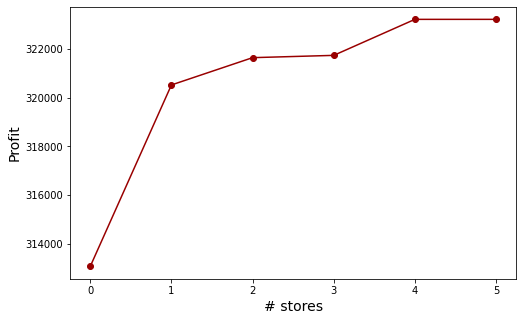

In [4]:
fig,ax = plt.subplots(figsize=(8, 5))
plt.plot(range(6), profits, 'ro-', color="#990000")
plt.xticks(range(6))
plt.ylabel("Profit", fontsize=14)
plt.xlabel("# stores", fontsize=14)

In [7]:
rCosts = [20854.1, 11964.9, 11098, 10971.4, 8860.45, 8860.45]
spent = [0, 1451.9, 1199.6, 1231.9, 1867, 1867]

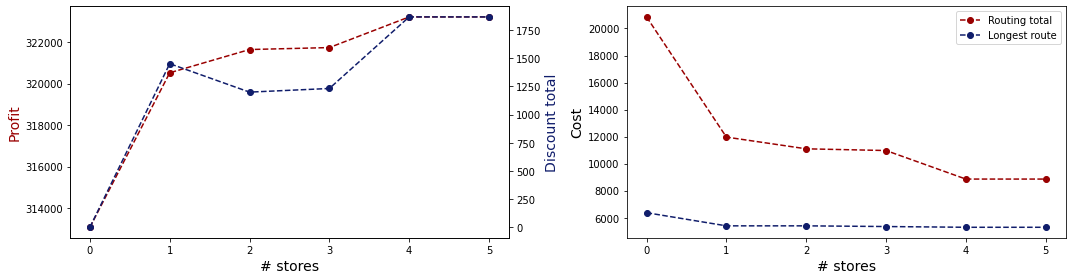

In [11]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(1, 2, figsize=(15, 4))
# make a plot
ax[0].plot(range(6), profits, color="#990000", marker="o", linestyle="--")
# set x-axis label
ax[0].set_xlabel("# stores", fontsize = 14)
# set y-axis label
ax[0].set_ylabel("Profit", color="#990000", fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax[0].twinx()
# make a plot with different y-axis using second axis object
ax2.plot(range(6), spent, color="#101D6B", marker="o", linestyle="--")
ax2.set_ylabel("Discount total",color="#101D6B",fontsize=14)
ax[1].plot(range(6), rCosts, linestyle="--", marker="o", color="#990000", label="Routing total")
ax[1].plot(range(6), lonRouts, linestyle="--", marker="o", color="#101D6B", label="Longest route")
ax[1].set_ylabel("Cost", fontsize=14)
ax[1].set_xlabel("# stores", fontsize=14)
ax[1].legend()
fig.tight_layout()
'''ax[2].plot(range(1, 6), pprods, linestyle="--", marker="o", color="#990000", label="Products")
ax[2].plot(range(1, 6), pcusts, linestyle="--", marker="o", color="#101D6B", label="Customers")
ax[2].set_xlabel("# stores", fontsize=14)
ax[2].set_ylabel("Percent", fontsize=14)
#ax[2].set(xlabel='# stores', ylabel='Percent')
ax[2].legend()'''
# save the plot as a file
fig.savefig('plots_k40.svg', dpi=300)

In [12]:
pprods = [64, 66.7, 76, 84, 84]
pcusts = [60, 62.5, 72.5, 72.5, 72.5]
pcustfull = [65, 57.5, 57.5, 65, 67.5]

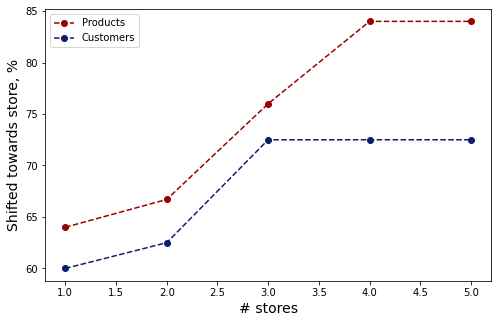

In [14]:
fig,ax = plt.subplots(figsize=(8, 5))
plt.plot(range(1, 6), pprods, linestyle="--", marker="o", color="#990000", label="Products")
plt.plot(range(1, 6), pcusts, linestyle="--", marker="o", color="#101D6B", label="Customers")
plt.ylabel("Shifted towards store, %", fontsize=14)
plt.xlabel("# stores", fontsize=14)
plt.legend()
fig.savefig('percent_store.svg', dpi=300)

In [8]:
lonRouts = [6372, 5400.5, 5400.5, 5349.4, 5294.1, 5294.1]
#rCosts = [16873, 7467, 7206, 6901, 6670, 6805, 7068]

In [26]:
(6371.979711371485 - 5399.358507846483)

972.6212035250019

In [33]:
(16873/3 - 7068/2)/16873

0.12388628775756137

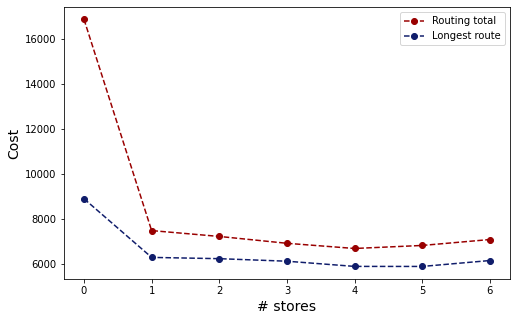

In [ ]:
fig,ax = plt.subplots(figsize=(8, 5))
plt.plot(range(7), rCosts, linestyle="--", marker="o", color="#990000", label="Routing total")
plt.plot(range(7), lonRouts, linestyle="--", marker="o", color="#101D6B", label="Longest route")
plt.ylabel("Cost", fontsize=14)
plt.xlabel("# stores", fontsize=14)
plt.legend()

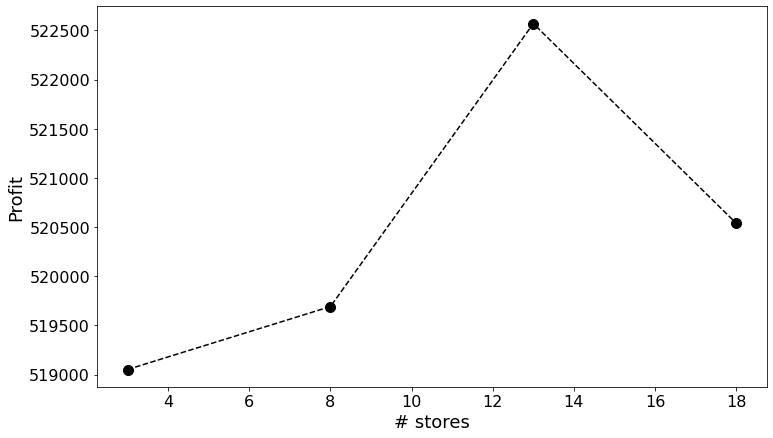

In [10]:
fig, ax = plt.subplots(figsize=(12, 7))
#plt.xlim([0, 20])
#plt.ylim([0, 3700])
ax.set_xlabel("# stores", fontsize=18)
ax.set_ylabel("Profit", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot([3, 8, 13, 18], profits, linestyle="--", marker="o", color="black", markersize=10)

# Old

In [3]:
file = "..\..\data\TSP_instance_n_10_s_1.dat"
f = open(file, 'r')
n = int(f.readline())
points = [[], []]

for line in f:
    coords = line.split()
    points[0].append(float(coords[0]))
    points[1].append(float(coords[1]))

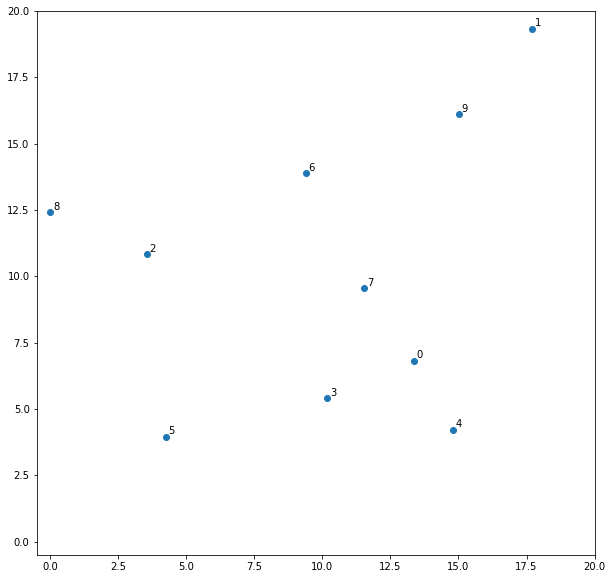

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.xlim([-0.5, 20])
plt.ylim([-0.5, 20])
plt.plot(points[0], points[1], "o")
for i in range(len(points[0])):
    plt.annotate(i, (points[0][i] + 0.1, points[1][i] + 0.1))

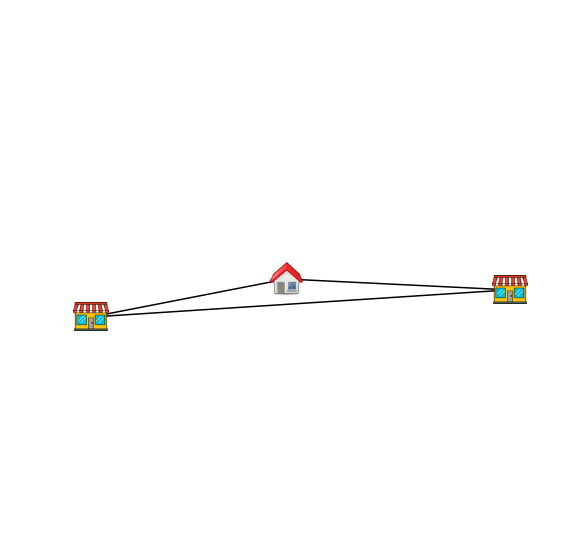

In [13]:
home = OffsetImage(plt.imread("..\\..\\modelling\\img\\home.png"), zoom=0.7)
store = OffsetImage(plt.imread("..\\..\\modelling\\img\\store.png"), zoom=0.7)
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
ab = AnnotationBbox(home, (0, 0), frameon=False)
ax.add_artist(ab)
ab = AnnotationBbox(store, (-3.5, -0.7), frameon=False)
ax.add_artist(ab)
ab = AnnotationBbox(store, (4, -0.2), frameon=False)
ax.add_artist(ab)
plt.plot([0, 4], [0, -0.2], color="black")
plt.plot([0, -3.5], [0, -0.7], color="black")
plt.plot([-3.5, 4], [-0.7, -0.2], color="black")


In [14]:
with open("D:\\Study\\Ph.D\\Projects\\Bilevel Optimization\\data\\results\\stats_p200.csv", "w", encoding="utf-16") as f1:
    out_f = csv.writer(f1, lineterminator="\n")
    out_f.writerow(["Instance", "Profit", "Routing Cost", "Runtime", "Gap"])
    for file in os.listdir("D:\\Study\\Ph.D\\Projects\\Bilevel Optimization\\data\\results\\output\p200"):
        fl = open("D:\\Study\\Ph.D\\Projects\\Bilevel Optimization\\data\\results\\output\\p200\\" + file, "r")
        lines = fl.readlines()
        out_f.writerow(lines[1].split(" , "))
        fl.close()

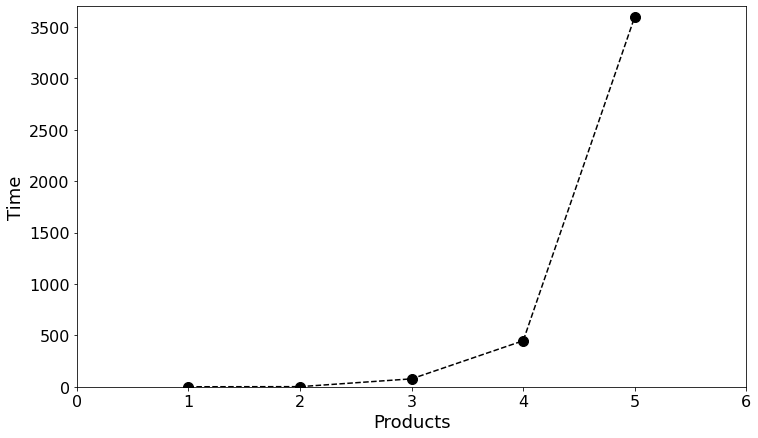

In [5]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.xlim([0, 6])
plt.ylim([0, 3700])
ax.set_xlabel("Products", fontsize=18)
ax.set_ylabel("Time", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(range(1, 6), [0.42, 1.46, 77.41, 448.03, 3600.14], linestyle="--", marker="o", color="black", markersize=10)

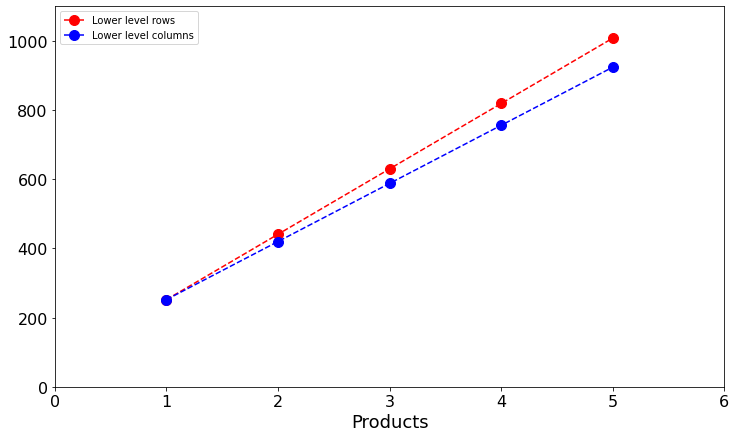

In [18]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.xlim([0, 6])
plt.ylim([0, 1100])
ax.set_xlabel("Products", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(range(1, 6), [252, 441, 630, 819, 1008], linestyle="--", marker="o", color="red", markersize=10, label="Lower level rows")
plt.plot(range(1, 6), [252, 420, 588, 756, 924], linestyle="--", marker="o", color="blue", markersize=10, label="Lower level columns")
plt.legend()